In [1]:
import tensorflow as tf
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras import utils
from keras.callbacks import Callback, TensorBoard

In [2]:
class EarlyStopCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (logs.get('val_accuracy') > 0.98):
            print("validation accuracy reach 98% correctness")
            self.model.stop_training = True

In [3]:
cb1 = EarlyStopCallback()

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
# print(train_images.shape, trainImages.shape)
# print(train_images[0])

In [4]:
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
# print(trainImages[0])
trainImages /= 255
testImages /= 255
# print(trainImages[0])
print(train_labels[:10])
NUM_DIGITS = 10
trainLabels = utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = utils.to_categorical(test_labels, NUM_DIGITS)

[5 0 4 1 9 2 1 3 1 4]


In [5]:
model = Sequential()
model.add(Dense(units=128, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=64, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
cb2 = TensorBoard(log_dir="logs/demo72", histogram_freq=0, write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, validation_data=(testImages, testLabels), callbacks=[cb1, cb2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
   1/1875 [..............................] - ETA: 0s - loss: 2.2475 - accuracy: 0.1250WARNING:tensorflow:From c:\users\admin\envs\pykt1102\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` i

In [6]:
predictLabels = model.predict_classes(testImages)
print("result:",predictLabels[:10])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
result: [7 2 1 0 4 1 4 9 5 9]


In [7]:
from matplotlib import pyplot as plt
def plotTestImage(index):
    plt.title(f"test image marked as {test_labels[index]}")
    plt.imshow(test_images[index], cmap='binary')
    plt.show()

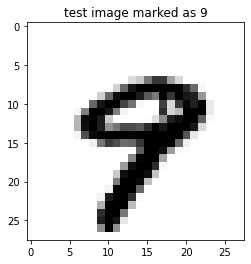

In [8]:
plotTestImage(9)

In [9]:
import pandas as pd
pd.crosstab(test_labels,predictLabels, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,0,1,2,1,4,1,2,0
1,0,1128,1,2,0,0,2,1,1,0
2,2,4,1005,5,2,0,1,6,7,0
3,0,0,3,997,1,3,0,3,3,0
4,0,1,4,0,972,0,1,1,1,2
5,1,0,0,23,2,853,7,1,4,1
6,1,3,2,1,6,5,939,0,1,0
7,1,9,8,1,3,0,0,999,3,4
8,3,0,4,6,3,1,1,5,948,3


In [10]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [13]:
attensions = measure1[(measure1.label==9) & (measure1.predict==4)]
attensions

,label,predict
1232,9,4
1901,9,4
2414,9,4
2720,9,4
2760,9,4
3460,9,4
3859,9,4
3869,9,4
3985,9,4
4823,9,4


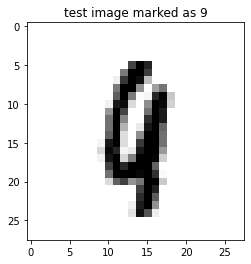

In [14]:
plotTestImage(1232)